<a href="https://colab.research.google.com/github/kelvynlukito/DataScience_ArtificialNeuralNetwork/blob/main/DataScience_ArtificialNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Neural Network**

### **Import Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
tf.__version__

'2.12.0'

# **Data Preprocessing**

### **Import Dataset**

In [5]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### **Exploratory Data Analysis (EDA)**

In [37]:
col_categorial = [df.select_dtypes(include='object')]
col_numeric = [df.select_dtypes(exclude='object')]

In [38]:
col_numeric

[      RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
 0             1    15634602          619   42       2       0.00   
 1             2    15647311          608   41       1   83807.86   
 2             3    15619304          502   42       8  159660.80   
 3             4    15701354          699   39       1       0.00   
 4             5    15737888          850   43       2  125510.82   
 ...         ...         ...          ...  ...     ...        ...   
 9995       9996    15606229          771   39       5       0.00   
 9996       9997    15569892          516   35      10   57369.61   
 9997       9998    15584532          709   36       7       0.00   
 9998       9999    15682355          772   42       3   75075.31   
 9999      10000    15628319          792   28       4  130142.79   
 
       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
 0                 1          1               1        101348.88       1  
 1                 1

In [39]:
col_categorial

[        Surname Geography  Gender
 0      Hargrave    France  Female
 1          Hill     Spain  Female
 2          Onio    France  Female
 3          Boni    France  Female
 4      Mitchell     Spain  Female
 ...         ...       ...     ...
 9995   Obijiaku    France    Male
 9996  Johnstone    France    Male
 9997        Liu    France  Female
 9998  Sabbatini   Germany    Male
 9999     Walker    France  Female
 
 [10000 rows x 3 columns]]

In [40]:
print(np.unique(df['Gender']))

['Female' 'Male']


In [41]:
print(np.unique(df['Geography']))

['France' 'Germany' 'Spain']


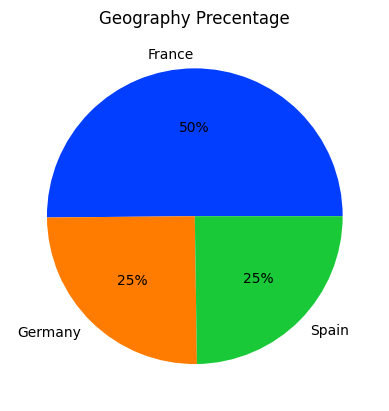

In [55]:
data_geo = df['Geography'].value_counts()

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data_geo, labels=np.unique(df['Geography']), colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.title('Geography Precentage')
plt.show()

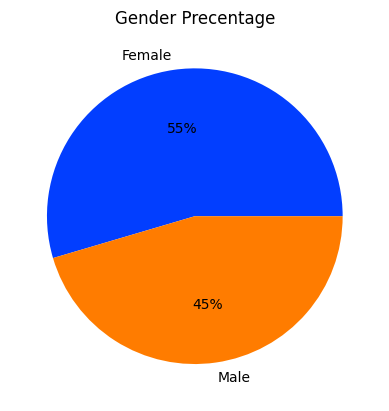

In [56]:
data_geo = df['Gender'].value_counts()

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data_geo, labels=np.unique(df['Gender']), colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.title('Gender Precentage')
plt.show()

Text(0.5, 1.0, 'Age Distribution')

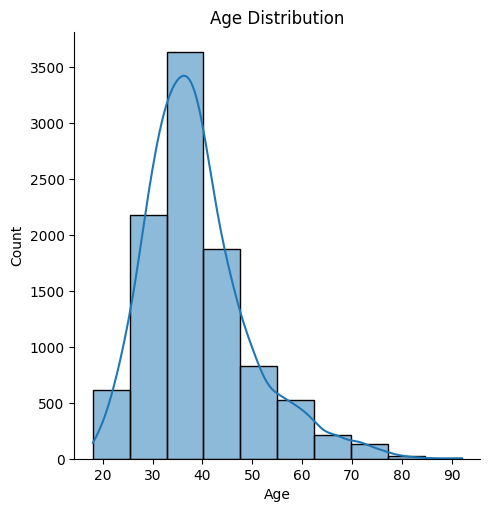

In [101]:
data_Age = df['Age']

# Plotting data into histogram
sns.displot(data_Age, kde=True, bins=10)

# display chart
plt.title('Age Distribution')

In [7]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

In [9]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [10]:
print(y)

[1 0 1 ... 1 1 0]


### **Encode Categorial Features**

In [11]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [12]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [ ]:
# One Hot Encoding

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encooder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [17]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting Training and Testing Set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

7500
2500
7500
2500


### Feature Scalling

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [82]:
print(X_train)
print(X_test)

[[ 1.00053348 -0.57776083 -0.57735027 ... -1.53973586  0.96978946
  -1.38284424]
 [-0.99946681  1.73082    -0.57735027 ...  0.64946204 -1.03115165
  -1.19589044]
 [ 1.00053348 -0.57776083 -0.57735027 ... -1.53973586 -1.03115165
  -0.68342242]
 ...
 [ 1.00053348 -0.57776083 -0.57735027 ... -1.53973586 -1.03115165
  -0.14675423]
 [ 1.00053348 -0.57776083 -0.57735027 ...  0.64946204 -1.03115165
  -0.0548954 ]
 [-0.99946681  1.73082    -0.57735027 ...  0.64946204  0.96978946
  -0.81796934]]
[[0.0 1.0 0.0 ... 0 0 41788.37]
 [1.0 0.0 0.0 ... 1 1 146379.3]
 [0.0 0.0 1.0 ... 1 0 58561.31]
 ...
 [1.0 0.0 0.0 ... 1 1 8316.19]
 [1.0 0.0 0.0 ... 0 0 81292.33]
 [0.0 1.0 0.0 ... 1 1 58426.81]]


In [83]:
print(len(X_train))
print(len(x_test))

7500
2500


# **Building Artificial Neural Network**

### **ANN Model**

In [84]:
ann = tf.keras.models.Sequential()

### **Add Input and First Hidden Layer**

In [87]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### **Add Second Hidden Layer**

In [88]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### **Add Third Hidde Layer**

In [89]:
ann.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))

### **Add Output Layer**

In [90]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# **Training ANN Model**

In [92]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [93]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
235/235 [==============================] - 3s 2ms/step - loss: 0.7130 - accuracy: 0.5029
Epoch 2/200
235/235 [==============================] - 1s 2ms/step - loss: 0.5128 - accuracy: 0.7947
Epoch 3/200
235/235 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7947
Epoch 4/200
235/235 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.8043
Epoch 5/200
235/235 [==============================] - 1s 2ms/step - loss: 0.4439 - accuracy: 0.8117
Epoch 6/200
235/235 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8147
Epoch 7/200
235/235 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8184
Epoch 8/200
235/235 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.8191
Epoch 9/200
235/235 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.8199
Epoch 10/200
235/235 [==============================] - 1s 2ms/step - loss: 0.4216 - accura

# **Making Prediction**

In [95]:
X_test = np.asarray(X_test).astype('float32')
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

79/79 [==============================] - 1s 6ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)}')

[[2003    0]
 [ 497    0]]
Accuracy Score : 0.8012


Text(0.5, 1.0, 'Accuracy Score 0.8012')

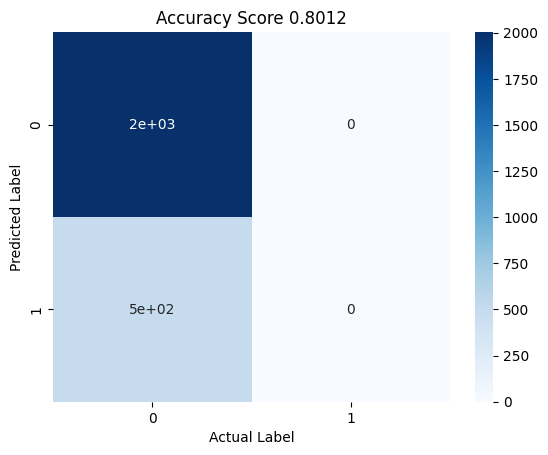

In [98]:
sns.heatmap(data=cm, annot=True, cmap='Blues')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title(f'Accuracy Score {accuracy_score(y_pred,y_test)}')